# British Airway

## Task 1
- Web scraping to gain company insights
- Scrape and analyse customer review data to uncover findings for British Airways

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\britishairway.csv")

In [52]:
df.head(10)

,verified,reviews
0,Trip Verified,Although it was a bit uncomfortable flight in ...
1,Trip Verified,Boarding was decently organised. The A380 stil...
2,Trip Verified,Boarding on time and departure on time for a f...
3,Trip Verified,My original flight was cancelled just over 2 w...
4,Trip Verified,Delayed just for a change. Poor communication....
5,Trip Verified,"Very competent check in staff, saw had a probl..."
6,Trip Verified,"Check in was so slow, no self check in and bag..."
7,Trip Verified,My review relates to the appalling experiences...
8,Trip Verified,This was my first time flying with BA & I was ...
9,Trip Verified,Lots of cancellations and delays and no one ap...


# Sentiment Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

# Data Preprocessing
- Tokenization
- Stop words
- Stemming and lemmatization

In [164]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [185]:
def preprocess_text(text):
    text = text.lower()
    text = " ".join(word for word in text.split() if word not in stop_words)
    text = " ".join(word for word in text.split() if word.isalpha())
    return text

In [186]:
df['cleaned_reviews'] = df['reviews'].apply(preprocess_text)

In [187]:
df.head()

,verified,reviews,sentiment,cleaned_reviews
0,Trip Verified,although it was a bit uncomfortable flight in ...,0.245714,although bit uncomfortable flight flight atten...
1,Trip Verified,boarding was decently organised. the a380 stil...,0.245714,boarding decently still rather strange configu...
2,Trip Verified,boarding on time and departure on time for a f...,0.245714,boarding time departure time flight london hea...
3,Trip Verified,my original flight was cancelled just over 2 w...,0.245714,original flight cancelled weeks actual flight ...
4,Trip Verified,delayed just for a change. poor communication....,0.245714,delayed poor british airways sells premium pri...


In [14]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
Text = df['reviews']

In [192]:
tokens = []
for review in df['cleaned_reviews']:
    try:
        words = nltk.word_tokenize(review)
        tokens.extend(words)
    except TypeError:
        continue

print(tokens)

['although', 'bit', 'uncomfortable', 'flight', 'flight', 'attendants', 'made', 'flight', 'best', 'possibly', 'nice', 'professional', 'attentive', 'looking', 'boarding', 'decently', 'still', 'rather', 'strange', 'configuration', 'club', 'world', 'neighbour', 'sitting', 'opposite', 'nearly', 'rather', 'poor', 'amenity', 'welcome', 'drink', 'ok', 'rather', 'long', 'waiting', 'aperitive', 'made', 'meal', 'ok', 'aside', 'champagne', 'european', 'wines', 'service', 'friendly', 'rather', 'spontaneous', 'refills', 'drinks', 'acceptable', 'continental', 'style', 'extremely', 'narrow', 'restrooms', 'without', 'lotions', 'acceptable', 'nothing', 'landing', 'minutes', 'waiting', 'luggage', 'labelled', 'boarding', 'time', 'departure', 'time', 'flight', 'london', 'heathrow', 'rather', 'narrow', 'business', 'light', 'meal', 'caesars', 'mousse', 'sweet', 'choice', 'drinks', 'nothing', 'wrong', 'short', 'friendly', 'landing', 'original', 'flight', 'cancelled', 'weeks', 'actual', 'flight', 'although', '

In [193]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))
filtered_tokens= [word for word in tokens if word.lower()not in stopwords]

In [195]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
stemmed_tokens=[word.lower() for word in filtered_tokens]

In [196]:
import string
punctuation_marks=string.punctuation

In [197]:
without_punctuation=[word.lower().translate(str.maketrans("","",punctuation_marks)) for word in stemmed_tokens if word.lower() not in stopwords]


In [198]:
token_punctuation = [token.strip() for token in without_punctuation]
token_punctuation = [token for token in token_punctuation if token.strip()]

> ## Word frequency distribution

In [200]:
from collections import Counter

In [201]:
word_frequency = Counter(token_punctuation)

In [202]:
word_frequency

Counter({'although': 86,
         'bit': 53,
         'uncomfortable': 37,
         'flight': 1335,
         'attendants': 31,
         'made': 140,
         'best': 90,
         'possibly': 9,
         'nice': 99,
         'professional': 43,
         'attentive': 33,
         'looking': 48,
         'boarding': 241,
         'decently': 1,
         'still': 159,
         'rather': 59,
         'strange': 3,
         'configuration': 16,
         'club': 208,
         'world': 93,
         'neighbour': 4,
         'sitting': 41,
         'opposite': 7,
         'nearly': 18,
         'poor': 94,
         'amenity': 12,
         'welcome': 26,
         'drink': 88,
         'ok': 49,
         'long': 135,
         'waiting': 49,
         'aperitive': 1,
         'meal': 156,
         'aside': 7,
         'champagne': 31,
         'european': 27,
         'wines': 17,
         'service': 531,
         'friendly': 104,
         'spontaneous': 1,
         'refills': 1,
         'drinks': 

In [203]:
def remove_one_or_two_char_tokens(token_punctuation):
    return [token for token in filtered_tokens if len(token)>2]

In [204]:
token_punctuation=remove_one_or_two_char_tokens(token_punctuation)

In [205]:
from nltk.probability import FreqDist

In [206]:
fdist = FreqDist(token_punctuation)

In [207]:
print(fdist.most_common(10))

[('flight', 1335), ('service', 531), ('london', 450), ('food', 441), ('crew', 435), ('seat', 433), ('one', 386), ('cabin', 372), ('british', 371), ('would', 368)]


In [208]:
from wordcloud import WordCloud

In [209]:
all_tokens_string = " ".join(token_punctuation)

In [210]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_tokens_string)

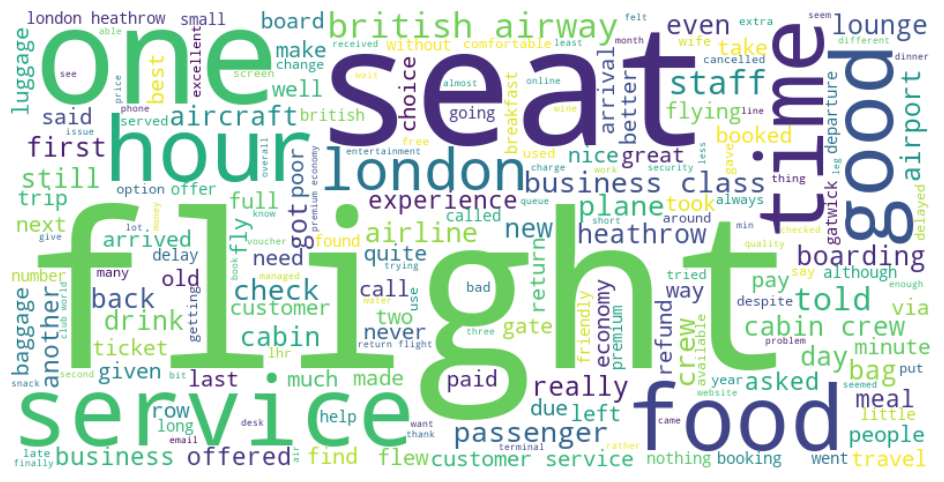

In [211]:
# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

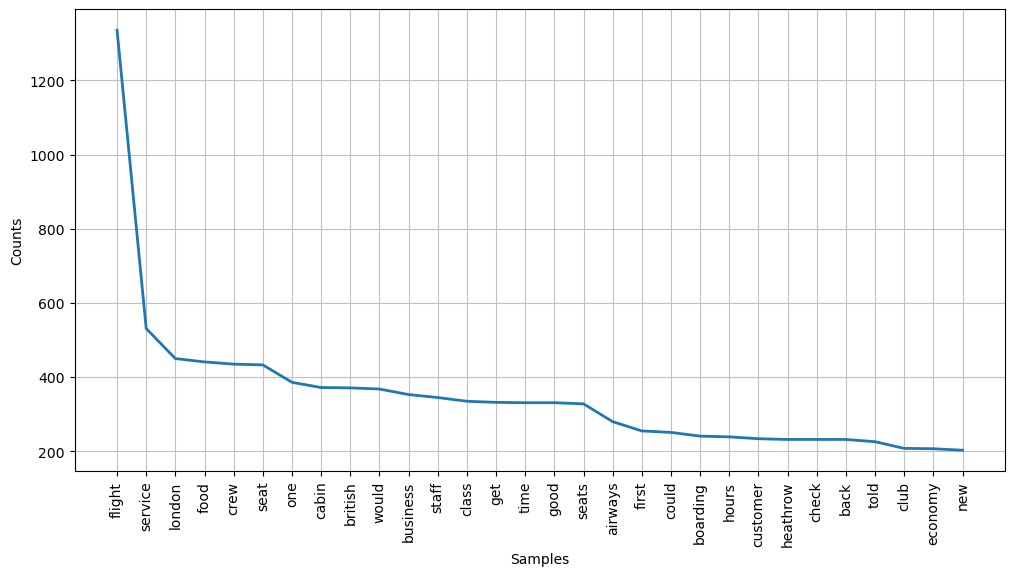

In [212]:
# Plot the frequency distribution using matplotlib's bar function
plt.figure(figsize=(12, 6))
fdist.plot(30, cumulative=False)
plt.show()

> ## Sentiment Distribution

In [111]:
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
analyzer = SentimentIntensityAnalyzer()

In [215]:
def vader_sentiment(review):
    scores = analyzer.polarity_scores(review)
    return scores['pos'], scores['neg'], scores['compound']

In [218]:
df['reviews'] = df['reviews'].astype(str) # convert to string type

In [221]:
df[['pos_score', 'neg_score', 'compound_score']] = df['cleaned_reviews'].apply(vader_sentiment).apply(pd.Series)

In [222]:
df.tail()

,verified,reviews,sentiment,cleaned_reviews,pos_score,neg_score,compound_score
995,Trip Verified,london to phoenix this week. having a window s...,"(0.199, 0.087, 0.9094)",london phoenix window seat top deck kind rest ...,0.436,0.100,0.9658
996,Trip Verified,glasgow to heathrow. very disappointed in brit...,"(0.072, 0.075, 0.1714)",glasgow disappointed british delayed therefore...,0.054,0.209,-0.8074
997,Trip Verified,brussels to shanghai via london heathrow. all ...,"(0.164, 0.098, 0.6705)",brussels shanghai via london flights clean foo...,0.153,0.200,-0.1531
998,Trip Verified,chicago to london heathrow. i was dubious abou...,"(0.132, 0.022, 0.9639)",chicago london dubious flying ba especially la...,0.230,0.052,0.9283
999,Trip Verified,athens to philadelphia via london. i chose ba ...,"(0.061, 0.067, -0.1451)",athens philadelphia via chose ba fare cheaper ...,0.000,0.209,-0.8402
